<a href="https://colab.research.google.com/github/tmj1432/Capstone-Deep-Learning-/blob/main/Capstone_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capstone : Phase 1

In this notebook, we will be evaluating models that we have trained in part 1.

---

## Mount Google Drive

In [1]:
 from google.colab import drive
 
 drive.mount('/content/gdrive')

Mounted at /content/gdrive


---

## Import Libraries

In [2]:
 pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import tensorflow as tf
import cv2
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import keras
from keras import activations
from keras.utils import to_categorical
from keras.models import load_model

from keract import get_activations, display_heatmaps, display_activations

---

## Create Test Data

### Function to crop face

In [4]:
def detectFaceOpenCVHaar(framepath, inHeight=300, inWidth=0):
    frame = cv2.imread(framepath)
    frameOpenCVHaar = frame.copy()
    frameHeight = frameOpenCVHaar.shape[0]
    frameWidth = frameOpenCVHaar.shape[1]
    if not inWidth:
        inWidth = int((frameWidth / frameHeight) * inHeight)

    scaleHeight = frameHeight / inHeight
    scaleWidth = frameWidth / inWidth

    frameOpenCVHaarSmall = cv2.resize(frameOpenCVHaar, (inWidth, inHeight))
    frameGray = cv2.cvtColor(frameOpenCVHaarSmall, cv2.COLOR_BGR2GRAY)

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = faceCascade.detectMultiScale(frameGray)
    bboxes = []
    for (x, y, w, h) in faces:
        x1 = x
        y1 = y
        x2 = x + w
        y2 = y + h
        cvRect = [int(x1 * scaleWidth), int(y1 * scaleHeight),
                  int(x2 * scaleWidth), int(y2 * scaleHeight)]
        bboxes.append(cvRect)
        cv2.rectangle(frameOpenCVHaar, (cvRect[0], cvRect[1]), (cvRect[2], cvRect[3]), (0, 255, 0),
                      int(round(frameHeight / 150)), 4)
      
    cropped_image = frameOpenCVHaar[cvRect[1]:cvRect[3], cvRect[0]:cvRect[2]]
    cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    return cropped_image

### Function to create test data

In [5]:
def create_image_data(data,img_size, datadirectory, classes):
    for category in classes:
        path = os.path.join(datadirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
              #function to crop face and grayscale
                img_array = detectFaceOpenCVHaar(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                data.append([new_array,class_num])
            except Exception as e:
                pass

### Create Test Data

In [6]:
# classes in dataset
classes = ['angry','happy','neutral','sad']

In [7]:
# read all the images and convert them to array
testing_data = [] 

# path
datadirectory_test = '/content/gdrive/MyDrive/Colab Notebooks/Capstone/phase 1/test' 

# using pre-defined function 
create_image_data(testing_data, 224, datadirectory_test, classes)

In [8]:
# shuffle training data 
random.Random(42).shuffle(testing_data)

### Create X and Y data

In [9]:
X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

In [12]:
# X forms the testing images, and y forms the testing labels
X_test = np.array(X_test)

y_test = to_categorical(y_test)

### Normalisation

In [15]:
# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], 224, 224, 1)
X_test = X_test.astype('float32')
X_test /= 255

---

## Model Evaluation

### Evaluation Functions

In [16]:
def plot_confusion_matrix(model, y_test):
  y_pred = model.predict(X_test, verbose=0)
  y_test =np.argmax(y_test, axis=1)
  # use argmax to retrieve corresponding index for max value of each test sample
  y_classes = [np.argmax(element) for element in y_pred]
  cm = confusion_matrix(y_test,y_classes, labels=[0,1,2,3])
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['Angry','Happy','Neutral','Sad'])
  
  disp.plot()
  plt.title('Confusion Matrix', fontsize=15, fontweight='bold')
  plt.show()
  

def get_classification_report(model, y_test):
  y_pred = model.predict(X_test, verbose=0)
  y_test =np.argmax(y_test, axis=1)
  # use argmax to retrieve corresponding index for max value of each test sample
  y_classes = [np.argmax(element) for element in y_pred]
  print("Classification Report: \n", classification_report(y_test, y_classes, target_names=['Angry',
                                                                                          'Happy',
                                                                                          'Neutral',
                                                                                          'Sad']))

### Load Models

In [20]:
#Load the model that was saved by ModelCheckpoint
model1 = load_model('/content/gdrive/MyDrive/Colab Notebooks/Capstone/27dec/model1_phase1.h5')

model2 = load_model('/content/gdrive/MyDrive/Colab Notebooks/Capstone/27dec/model2_phase1.h5')

model3 = load_model('/content/gdrive/MyDrive/Colab Notebooks/Capstone/27dec/model3_phase1.h5')

### Evaluations

Classification Report: 
               precision    recall  f1-score   support

       Angry       0.66      0.94      0.78        33
       Happy       1.00      0.58      0.73        33
     Neutral       0.75      0.45      0.57        33
         Sad       0.65      0.91      0.76        33

    accuracy                           0.72       132
   macro avg       0.77      0.72      0.71       132
weighted avg       0.77      0.72      0.71       132



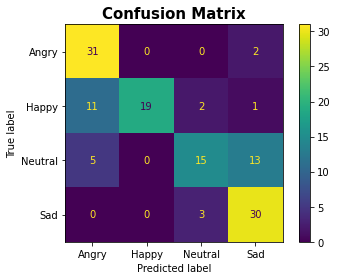

In [23]:
get_classification_report(model1, y_test)
plot_confusion_matrix(model1, y_test)

Classification Report: 
               precision    recall  f1-score   support

       Angry       0.73      0.97      0.83        33
       Happy       0.96      0.76      0.85        33
     Neutral       0.63      0.52      0.57        33
         Sad       0.71      0.76      0.74        33

    accuracy                           0.75       132
   macro avg       0.76      0.75      0.75       132
weighted avg       0.76      0.75      0.75       132



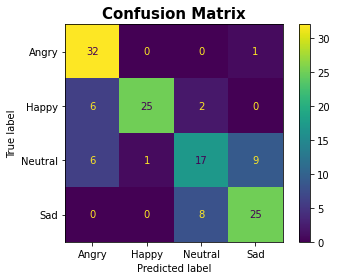

In [24]:
get_classification_report(model2, y_test)
plot_confusion_matrix(model2, y_test)

Classification Report: 
               precision    recall  f1-score   support

       Angry       0.61      1.00      0.76        33
       Happy       1.00      0.73      0.84        33
     Neutral       0.78      0.42      0.55        33
         Sad       0.75      0.82      0.78        33

    accuracy                           0.74       132
   macro avg       0.78      0.74      0.73       132
weighted avg       0.78      0.74      0.73       132



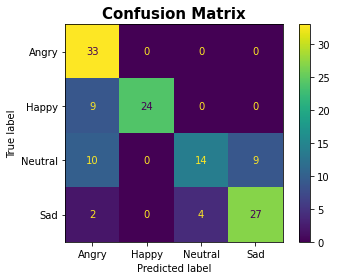

In [25]:
get_classification_report(model3, y_test)
plot_confusion_matrix(model3, y_test)

If we compare all three models, we can see that **model 3 (dropout layers included and hyperparameter tuning) gave us the best result we were looking for which is a high recall for angry faces**.

Based on the classification report, we see that the **recall score for Angry faces is 1**. This means that out of all instances that I am showing an angry face the model was able to predict all of them as angry faces. This is actually good for us as we are building this model for the use of customer service where it is crucial to attend to angry customers. 

However, by looking at the confusion matrix, we see that there are quite a few neutral faces being predicted as angry faces. But, there is **more costs involved in not being able to predict angry faces** than any other facial expressions. If a customer leaves angry, there could be potential risk of the customer writing a bad review on the establishment. If the establishment was able to identify these angry and sad customers, they might be able to provide service recovery before it is too late.

Next, we will look at the prediction for sad faces. If an establishment wishes to go the extra mile for customers to impress them, identifying customers who are sad and showing effort to make their day would definitely create great customer experiences for them. From the confusion matrix, we see that **27 out of 33 sad faces were predicted as sad faces** by the model. Additionally, 2 of the sad faces were predicted as angry. However, having the **2 wrongly classified sad faces as angry faces does not pose as a case for concern** in contrary, it may even help staff become aware that a particular customer is sad while they were checking out for potential angry customers.

In total, there were 66 faces in total for both angry and sad faces. **Out of 66, 60 were correctly predicted**. This means that the model was **able to predict 91% of such angry and sad faces**. 

If we were to include the 2 sad faces that were predicted as angry faces, it would mean that **62 out of 66 angry and sad faces were predicted as angry and sad faces**. This would bring the percentage up to **94%**.

### Visualise Predictions

In [26]:
# predict Y using CNN model on test data
y_pred = model3.predict(X_test)

y_test_max =np.argmax(y_test, axis=1)
# use argmax to retrieve corresponding index for max value of each test sample
y_classes = [np.argmax(element) for element in y_pred]

# predicted Y values is a normalised prob distr of values between 0 to 1 as a result of softmax activation function used
wrong_classified = np.nonzero(y_classes != y_test_max)[0]
correct_classified = np.nonzero(y_classes==y_test_max)[0]

5/5 [==============================] - 6s 980ms/step


Class 0: Angry, Class 1: Happy, Class 2: Neutral, Class 3: Sad


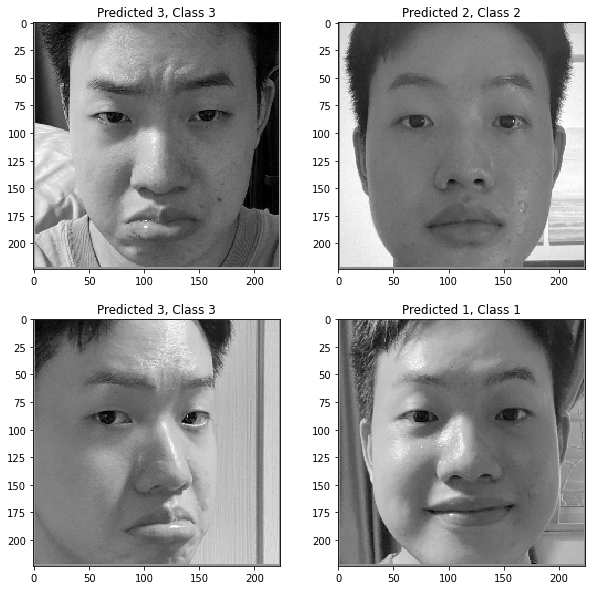

In [34]:
print('Class 0: Angry, Class 1: Happy, Class 2: Neutral, Class 3: Sad')
plt.figure(figsize=(10,10))
for i, correct in enumerate(correct_classified[21:25]):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[correct].reshape(224,224), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_classes[correct], y_test_max[correct]))

Class 0: Angry, Class 1: Happy, Class 2: Neutral, Class 3: Sad


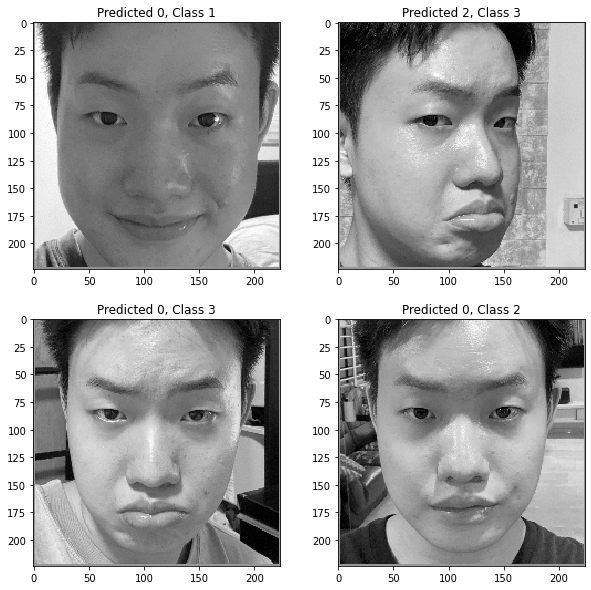

In [33]:
print('Class 0: Angry, Class 1: Happy, Class 2: Neutral, Class 3: Sad')
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(wrong_classified[20:24]):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[incorrect].reshape(224,224), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_classes[incorrect], y_test_max[incorrect]))

Based on the wrongly predicted images, most of the images are predicted as angry faces. I would infer that the eyebrows plays a big part in the model's prediction and since I have a more arched eyebrow by nature, there is a higher chance for it to be predicted as angry face when it is not.

### Visualist Activations

conv2d_4_input (1, 224, 224, 1) 


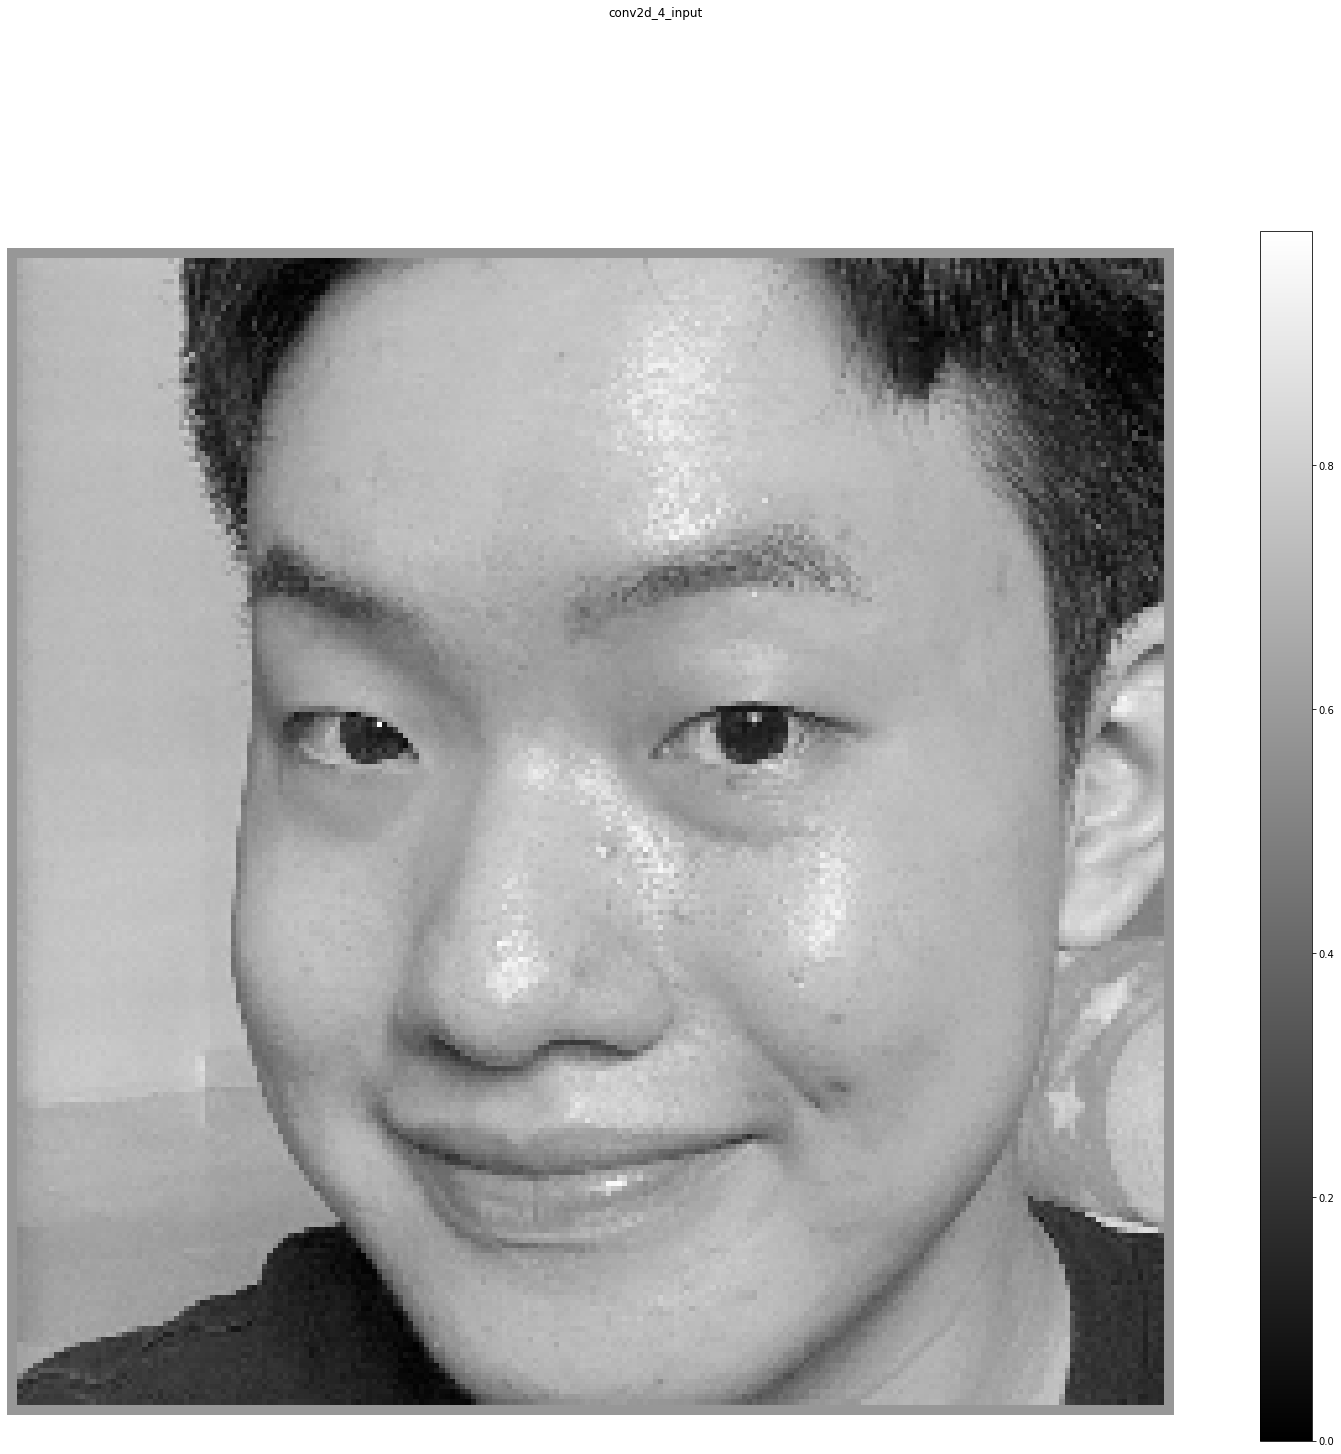

conv2d_4 (1, 222, 222, 64) 


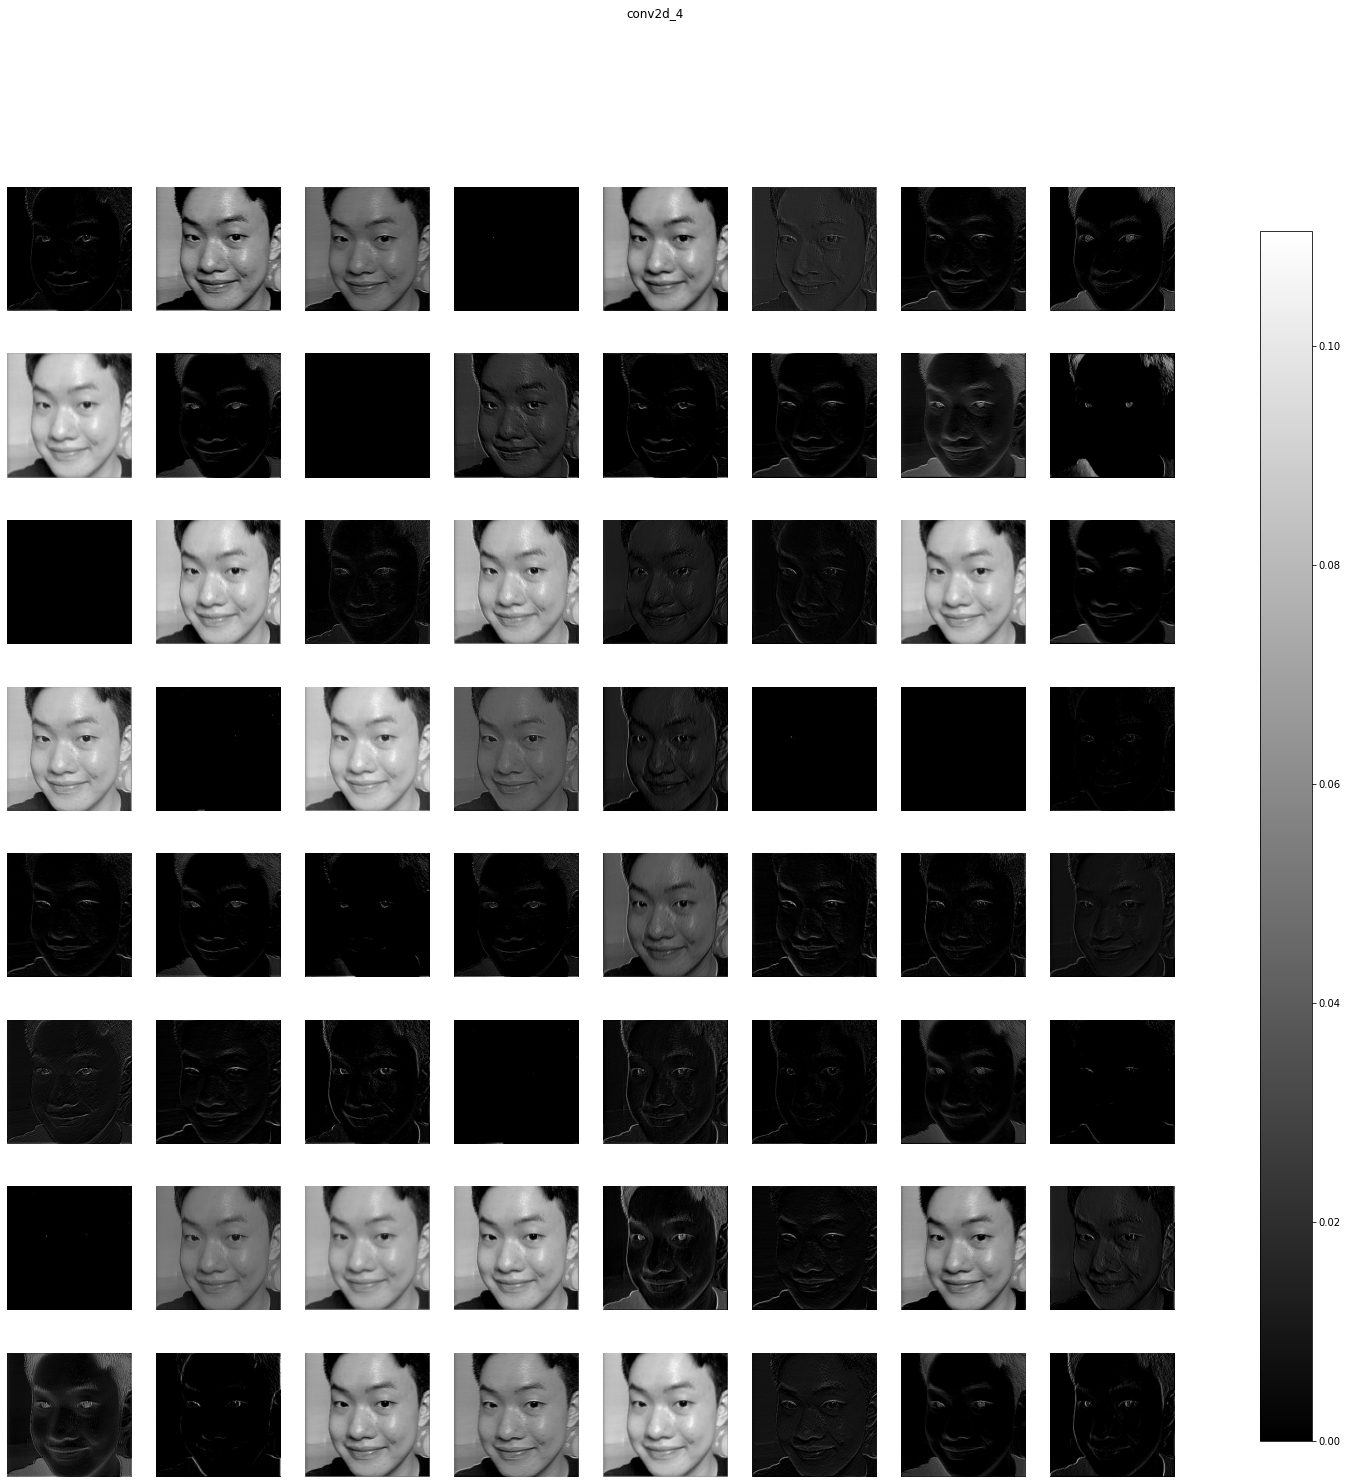

max_pooling2d_4 (1, 111, 111, 64) 


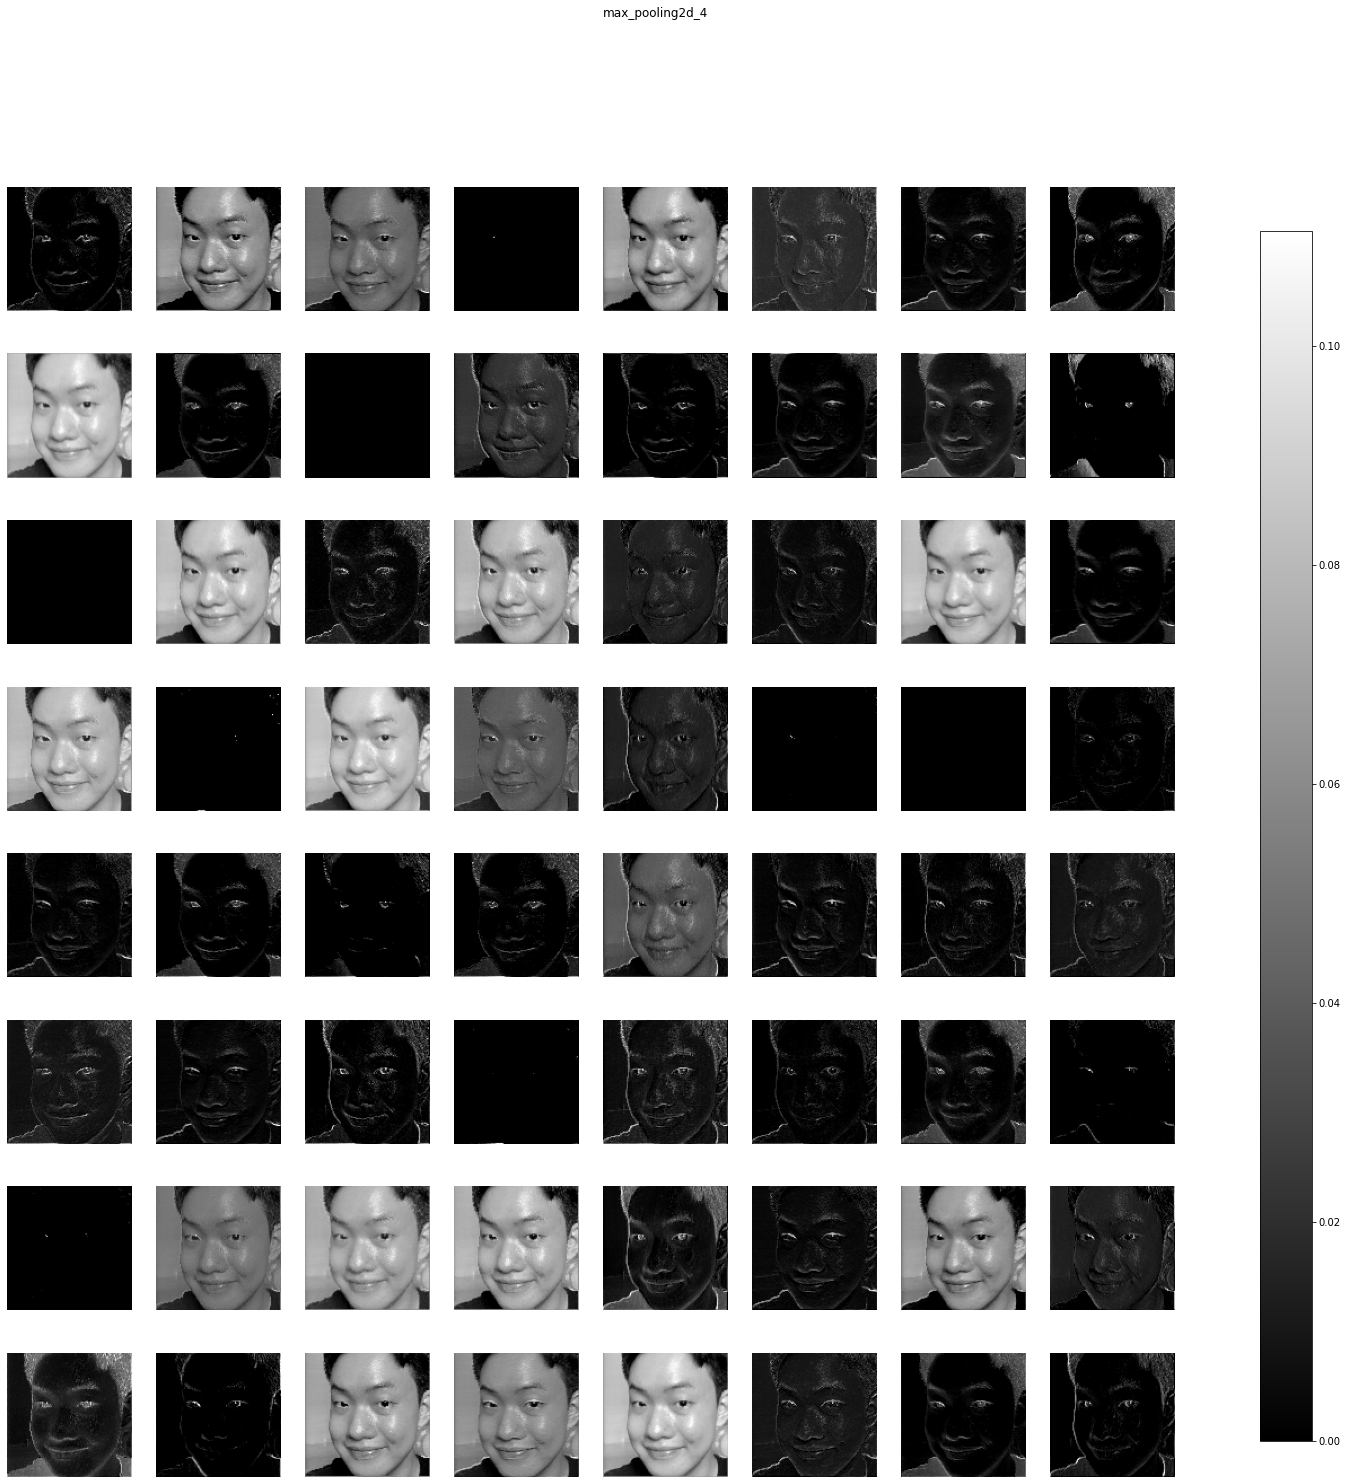

conv2d_5 (1, 109, 109, 64) 


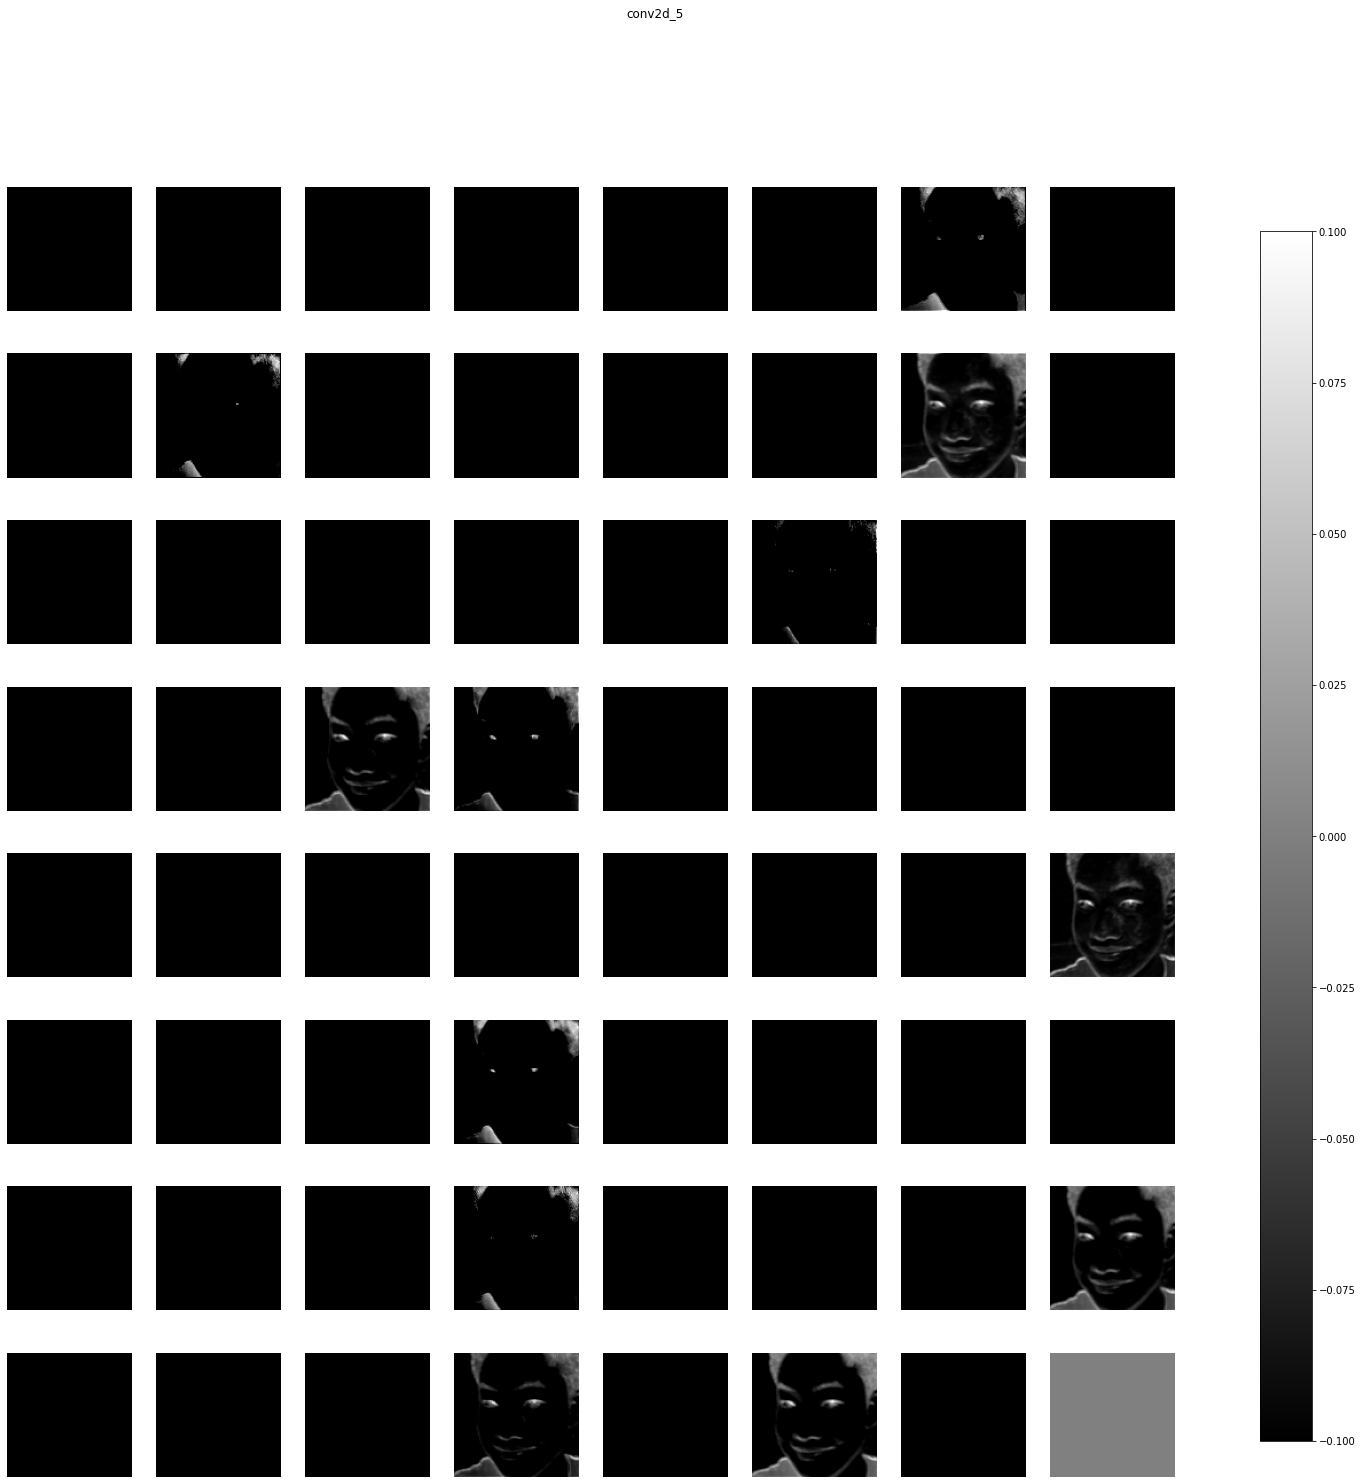

max_pooling2d_5 (1, 54, 54, 64) 


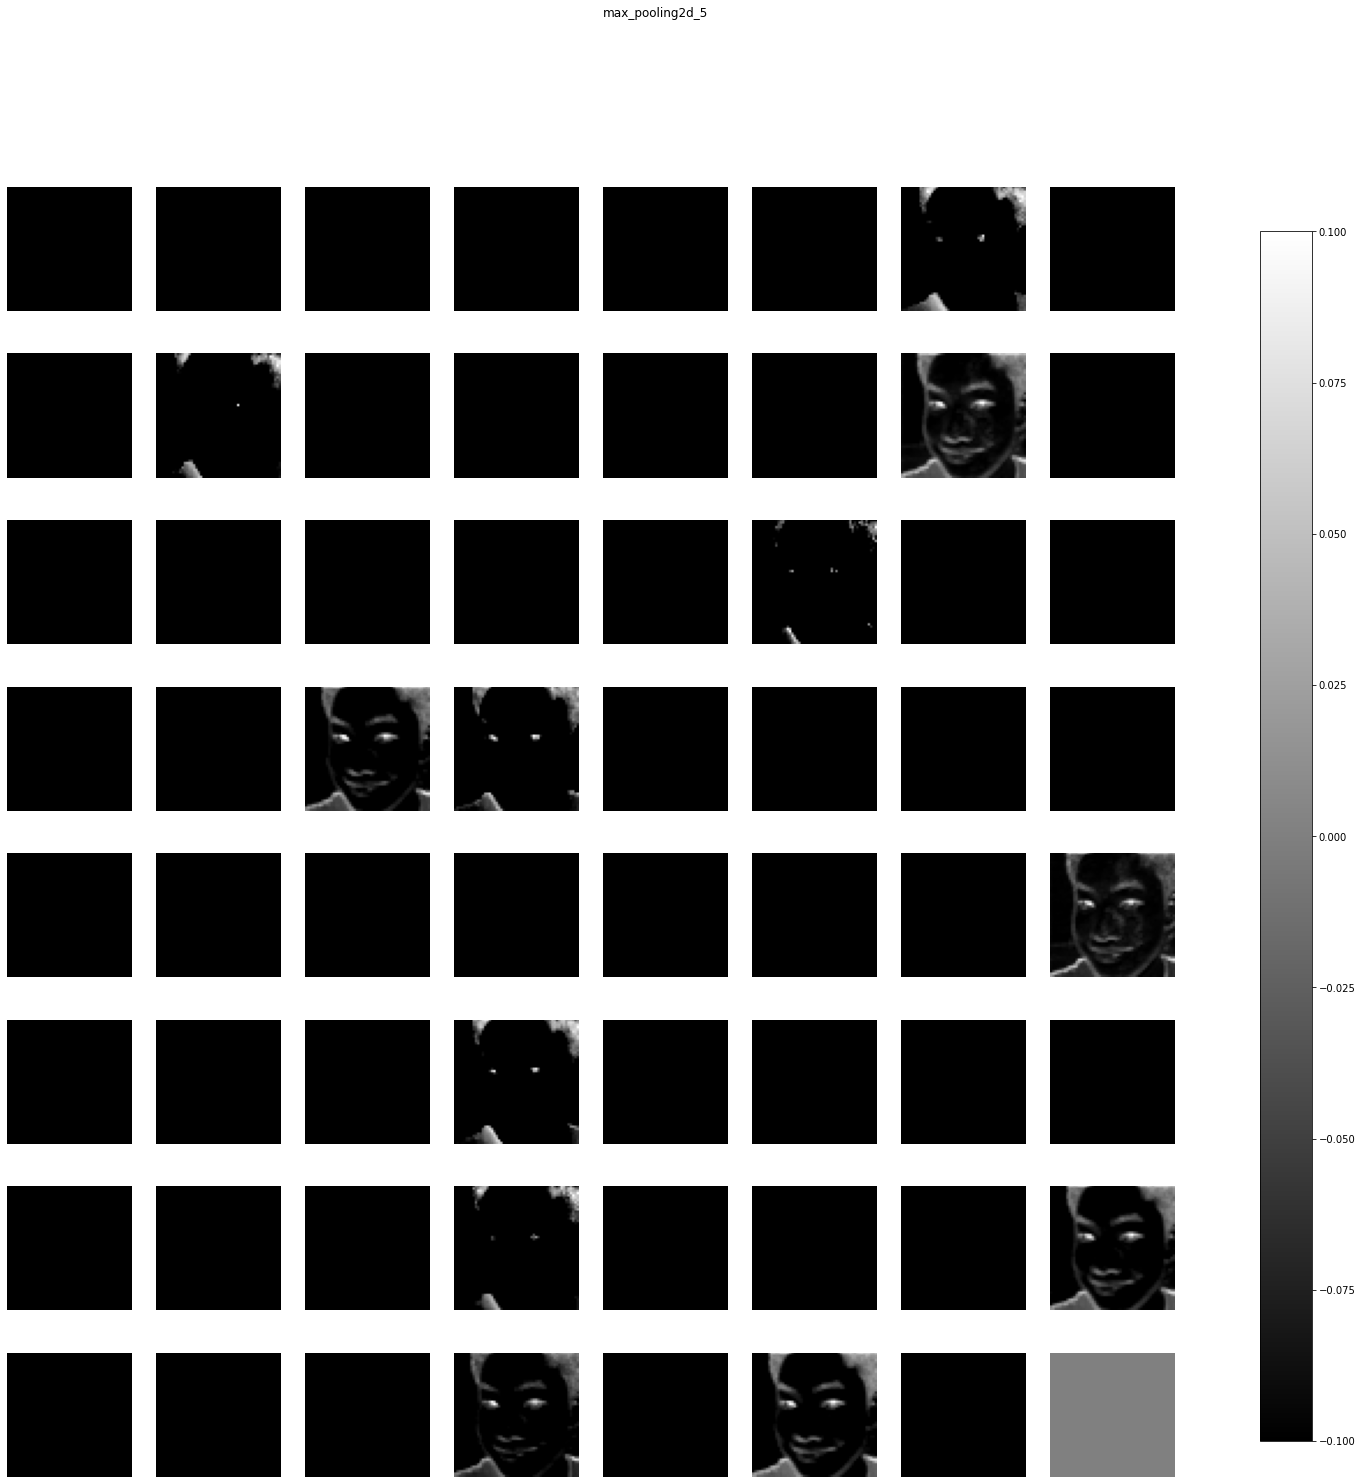

dropout_4 (1, 54, 54, 64) 


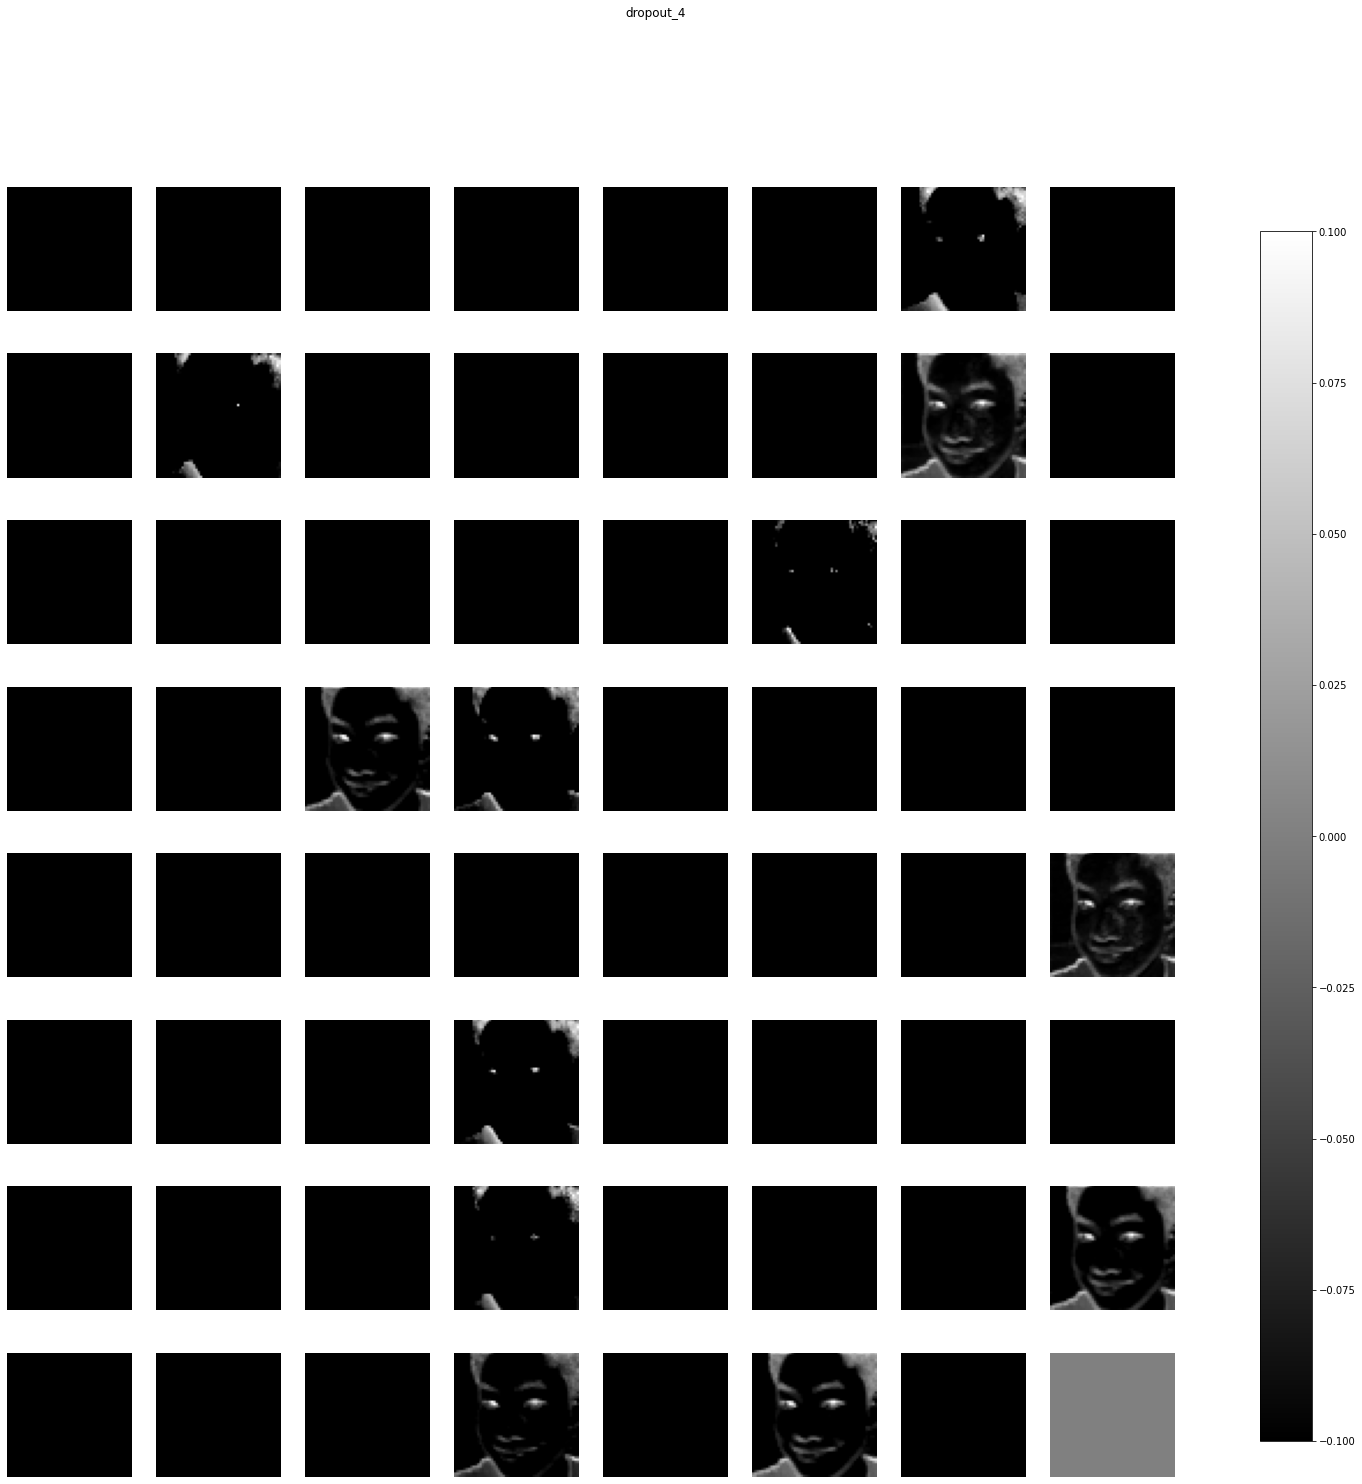

flatten_2 (1, 186624) 


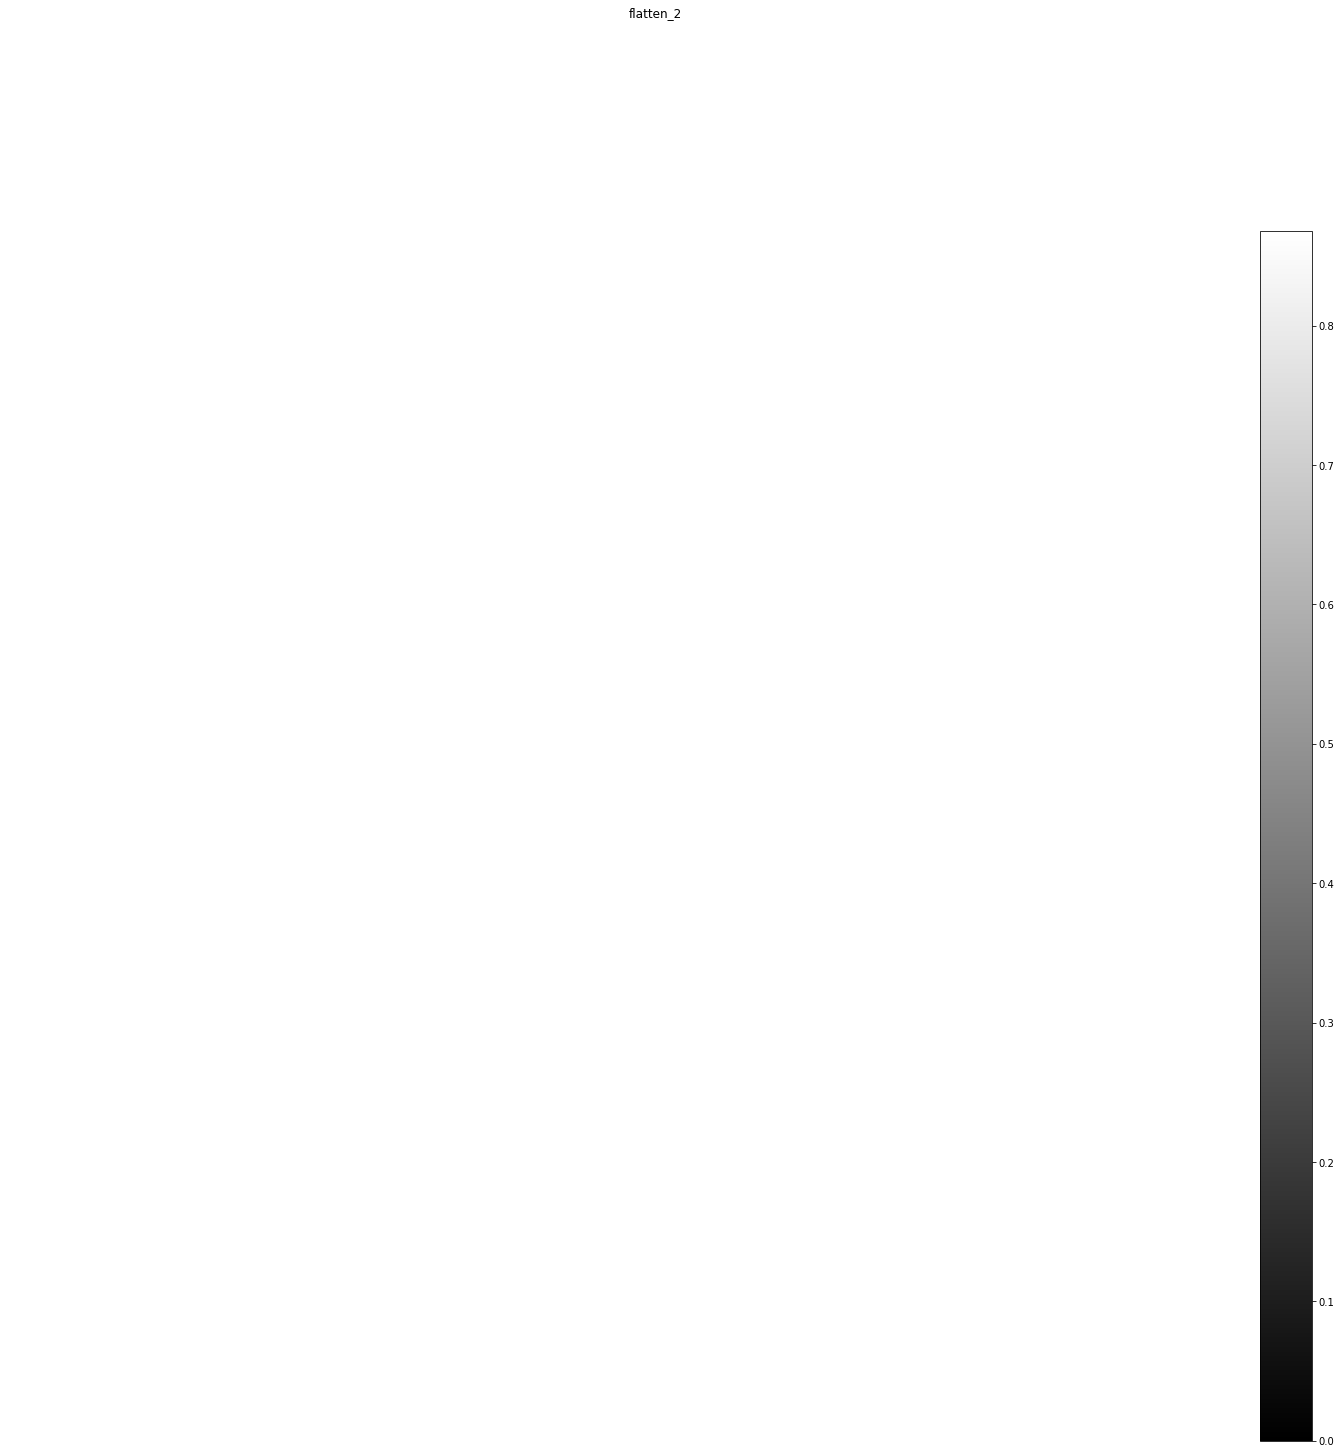

dense_4 (1, 64) 


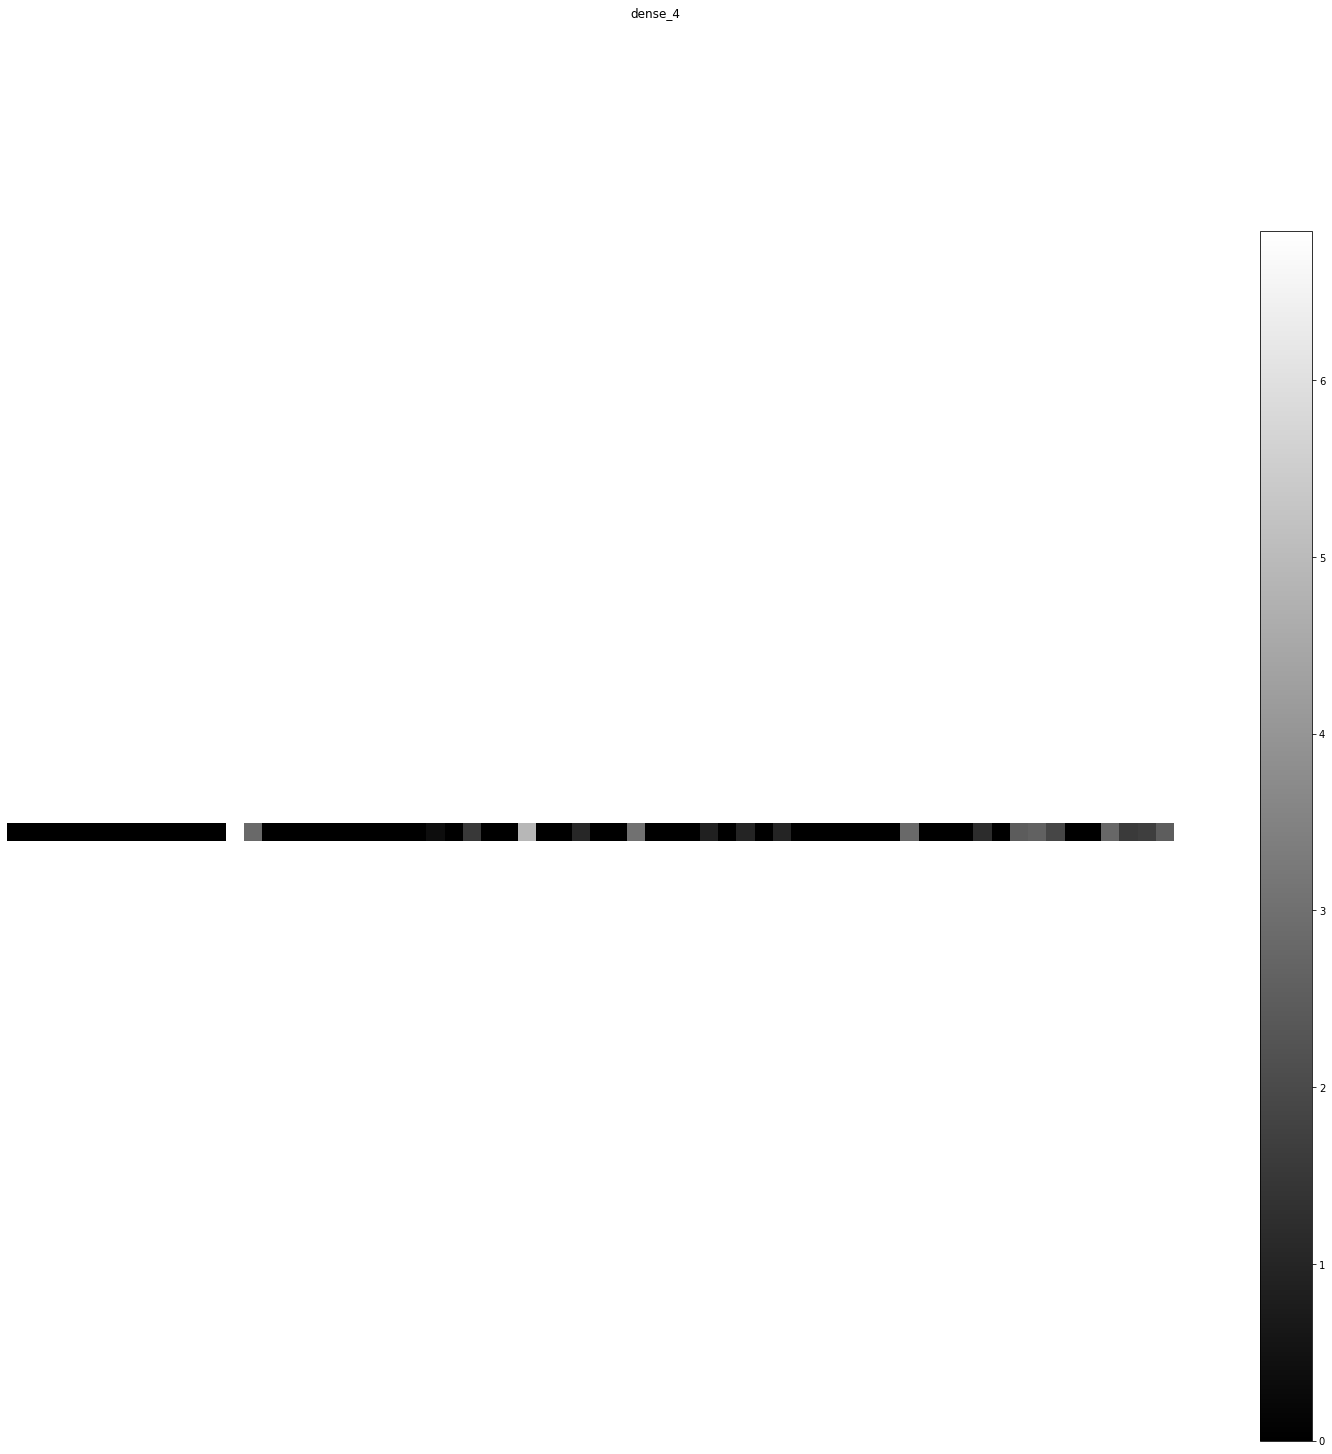

dropout_5 (1, 64) 


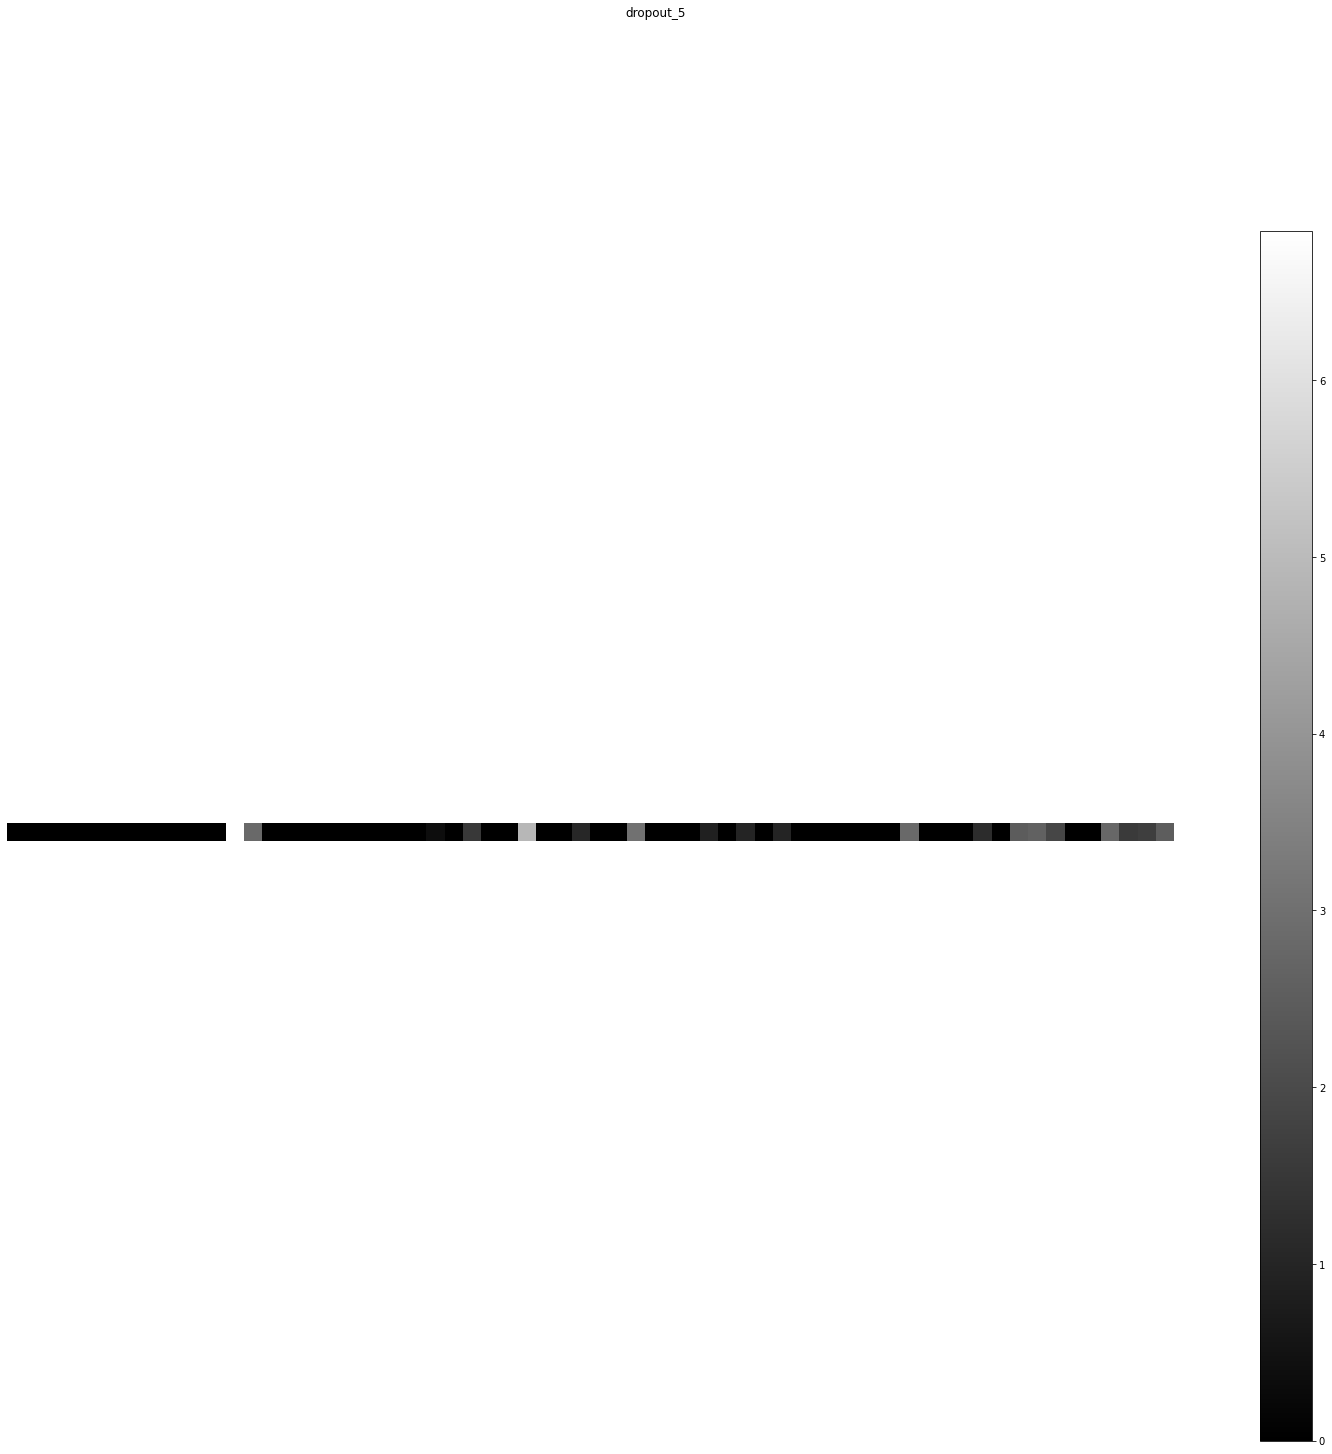

dense_5 (1, 4) 


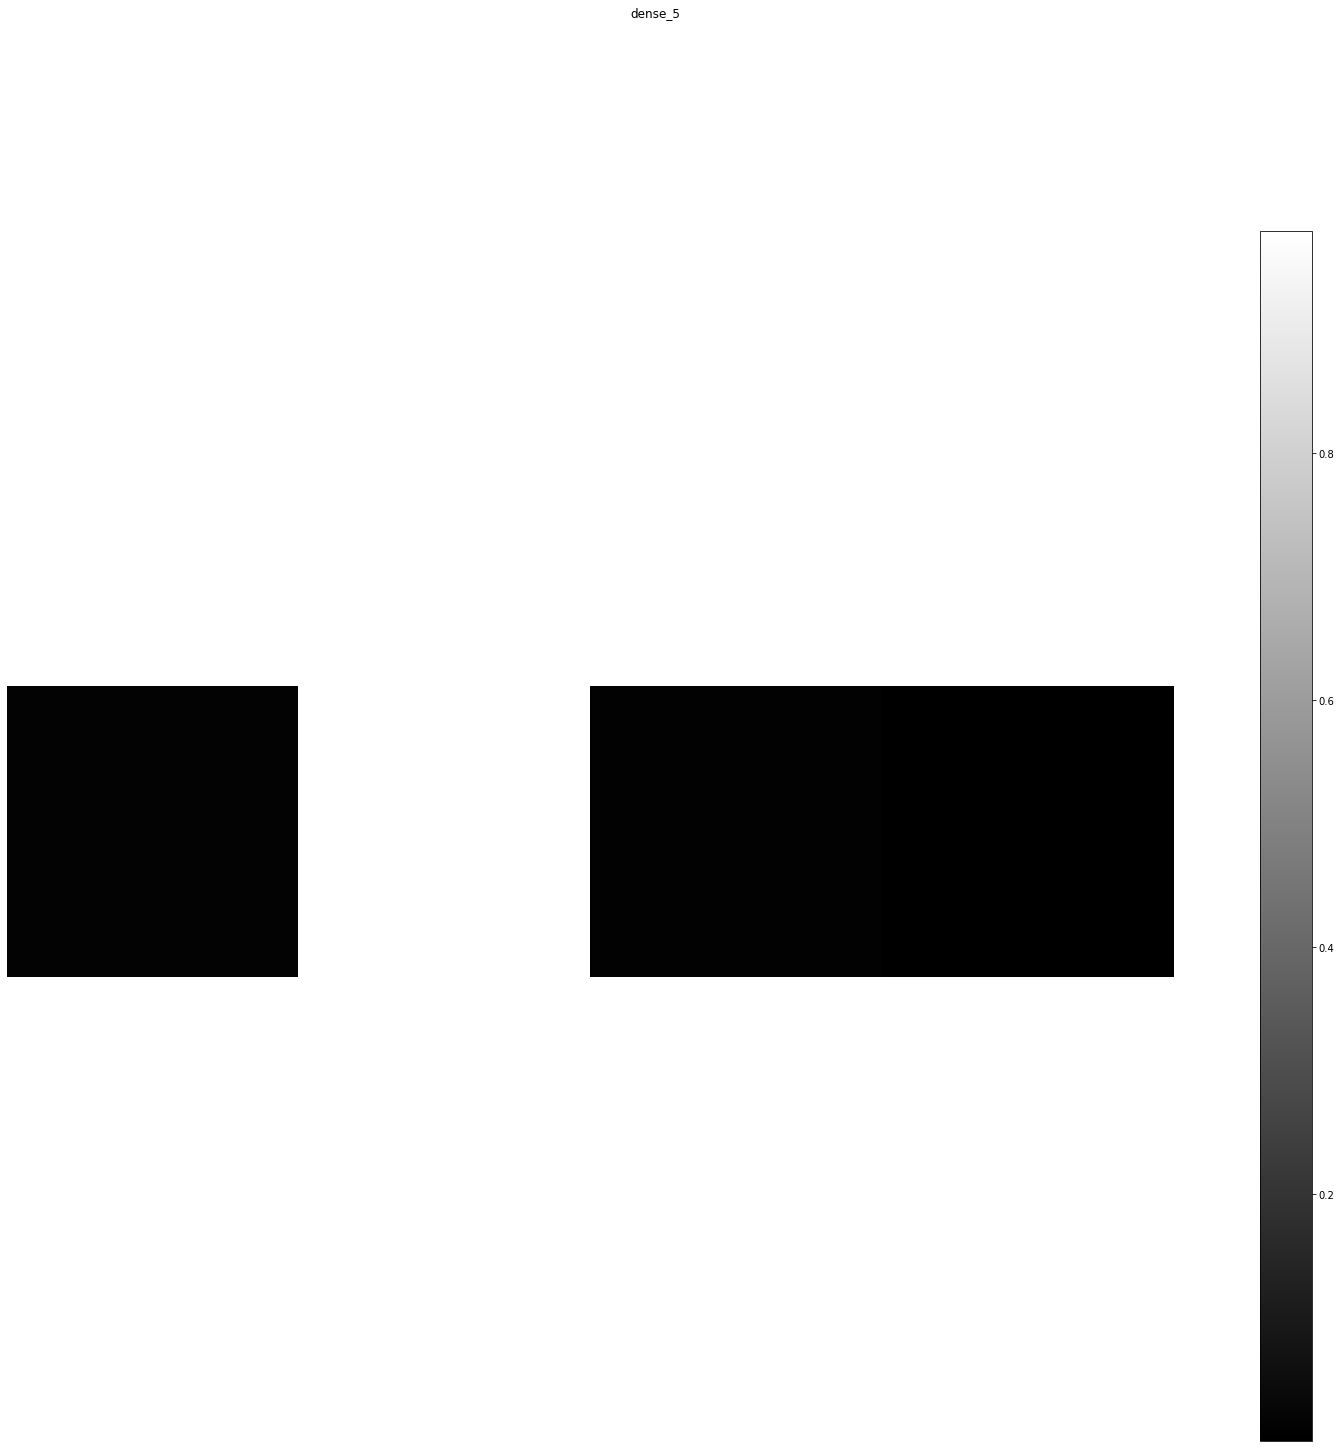

In [37]:
keract_inputs = X_test[1:2]
keract_targets = y_test[:0]
activations = get_activations(model3, keract_inputs)

display_activations(activations=activations, cmap='gray')

By visualising the activations, we can see how an image is being processed through the model at different layers. We can see that after the second layer of convolution, we start to extract features such as the eyebrows and eyes as well as little bit of the lips. This further proves my inference that the model's prediction may be heavily influenced by the shape of the eyebrows.

## Conclusion and Recommendations

**Conclusion**

To conclude this notebook, I would consider this to be a **success**. We have looked at many different ways and technique to help increase generalizability of our model. E.g. by cropping my face to reduce noise, applying image augmentation, using dropout layers as well as implementing earlystopping and model checkpoints. 

We also managed to hit a **recall for angry faces of 100%** which surpasses our target of 80%. Overall, I would say that this model exceeded expectation. 

**Limitations**

Some limitations I have is time, with more time, we will be able to test out even more complex models and tune even more parameters.

**Recommendations**

1) More photos and expressions could be implemented into the model to further increase generalizability of the model to unseen data.

2) Currently, this model is only trained using pictures of me. In the future, photos of others can be collected so that the model will be able to generalize on other types of faces and their facial expressions. 

3) Use a different approach such as facial mapping.

---